In [3]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import peakutils
import scipy
from scipy import signal
from scipy import integrate
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import model_from_json
import warnings
import random
import math
from math import pi
import seaborn as sns
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Arial'})

In [4]:
model_data = pd.read_csv(r'M:\THESIS_IPT\MRIDUL\data_overlapping_windows\points1000_20ms\airmill.csv')
model_data

,max_x,max_y,max_z,aircut
0,0.326107,0.476588,0.430965,0
1,0.326107,0.486047,0.450301,0
2,0.304012,0.501807,0.450301,0
3,0.329262,0.501807,0.411629,0
4,0.345035,0.508113,0.411629,0
...,...,...,...,...
13597,0.106460,0.193043,0.147379,0
13598,0.106460,0.145750,0.147379,0
13599,0.112773,0.161510,0.131266,0
13600,0.112773,0.183582,0.124821,0


In [5]:
Y_nn = model_data['aircut']
X_nn = model_data.drop(['aircut'], axis=1)

In [6]:
# dividing data into training and test sets
Y_nn = np.ravel(Y_nn)
X_TrainVal, X_test, Y_TrainVal, Y_test = train_test_split(X_nn, Y_nn, 
                                                    test_size = 0.2, 
                                                    random_state = 3,
                                                    shuffle = True)

X_train, X_val, Y_train, Y_val = train_test_split(X_TrainVal, Y_TrainVal, 
                                                    test_size = 0.2, 
                                                    random_state = 3,
                                                    shuffle = True)

In [7]:
# scaling the input to neural network
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [8]:
# neural network model

model = Sequential()
model.add(Dense(5, activation = 'sigmoid',input_shape = (3,)))
#model.add(Dense(units = 5, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))
print(model.summary())

# Compile model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, batch_size=100, epochs=100, validation_data=(X_val,Y_val), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
88/88 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5620 - val_loss: 0.6248 - val_accuracy: 0.5480
Epoch 2/100
88/88 [==============================] - 0s 861us/step - loss: 0.5726 - accuracy: 0.6280 - val_loss: 0.5415 - val_accuracy: 0.7074
Epoch 3/100
88/88 [==============================] - 0s 713us/step - loss: 0.4974 - accuracy: 0.8002 - val_loss: 0.4725 - val_accuracy: 0.8222
Epoch 4/100
88/88 [==============================] - 0s 741us/step - loss: 0.4337 - accura

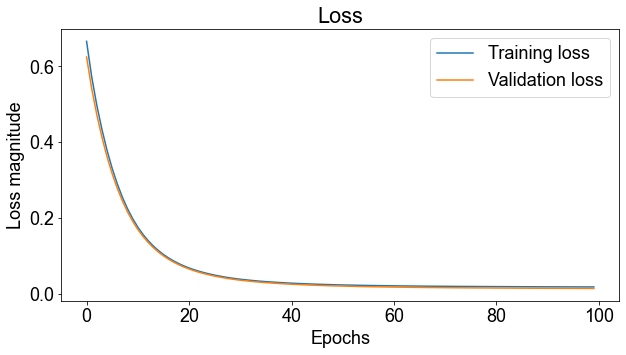

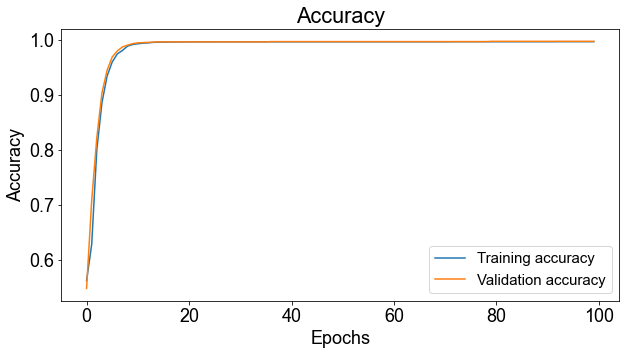

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss magnitude')
plt.legend()
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\loss_air_mill.png',bbox_inches='tight',dpi=1000)
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(fontsize=15)
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\acc_air_mill.png',bbox_inches='tight',dpi=1000)
plt.show()

In [10]:
model.evaluate(X_test, Y_test, verbose=1)

86/86 [==============================] - 0s 390us/step - loss: 0.0226 - accuracy: 0.9956


[0.02256498485803604, 0.9955898523330688]

In [11]:
X_test_prediction = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1573
           1       1.00      0.99      0.99      1148

    accuracy                           1.00      2721
   macro avg       1.00      0.99      1.00      2721
weighted avg       1.00      1.00      1.00      2721



In [12]:
print(confusion_matrix(Y_test, X_test_prediction))

[[1573    0]
 [  12 1136]]


In [ ]:
# # saving model
# model_json = model.to_json()
# with open(r"M:\THESIS_IPT\MRIDUL\code\data processing\AirMillmodel.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights(r"M:\THESIS_IPT\MRIDUL\code\data processing\AirMillmodel.h5")
# print("Saved model to disk")